<a href="https://colab.research.google.com/github/rtajeong/Kyungnam_univ_M4/blob/main/lab_100_autoencoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Autoencoder

In [ ]:
import tensorflow.keras 
from tensorflow.keras import layers

# A simple Autoencoder

- We'll start simple, with a single fully-connected neural layer as encoder and as decoder:

In [ ]:
encoding_dim = 32 # size of encoded representation
input_img = keras.Input(shape=(784,))
encoded = layers.Dense(encoding_dim, activation='relu')(input_img)
decoded = layers.Dense(784, activation='sigmoid')(encoded)

autoencoder = keras.Model(input_img, decoded)

In [ ]:
autoencoder.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
dense (Dense)                (None, 32)                25120     
_________________________________________________________________
dense_1 (Dense)              (None, 784)               25872     
Total params: 50,992
Trainable params: 50,992
Non-trainable params: 0
_________________________________________________________________


- let's create a separate encoder and decoder model

In [ ]:
encoder = keras.Model(input_img, encoded)

- As well as the decoder model:

In [ ]:
# This is our encoded (32-dimensional) input
encoded_input = keras.Input(shape=(encoding_dim,))
decoder_layer = autoencoder.layers[-1]
# Create the decoder model
decoder = keras.Model(encoded_input, decoder_layer(encoded_input))

- Now let's train our autoencoder to reconstruct MNIST digits.

In [ ]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

- Let's prepare our input data. We're using MNIST digits, and we're discarding the labels (since we're only interested in encoding/decoding the input images).

In [ ]:
from tensorflow.keras.datasets import mnist
import numpy as np
(x_train, _), (x_test, _) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [ ]:
x_train.shape

(60000, 28, 28)

In [ ]:
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


In [ ]:
autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/50
235/235 [==============================] - 3s 4ms/step - loss: 0.3853 - val_loss: 0.1898
Epoch 2/50
235/235 [==============================] - 1s 3ms/step - loss: 0.1803 - val_loss: 0.1541
Epoch 3/50
235/235 [==============================] - 1s 3ms/step - loss: 0.1496 - val_loss: 0.1334
Epoch 4/50
235/235 [==============================] - 1s 3ms/step - loss: 0.1313 - val_loss: 0.1214
Epoch 5/50
235/235 [==============================] - 1s 3ms/step - loss: 0.1203 - val_loss: 0.1131
Epoch 6/50
235/235 [==============================] - 1s 3ms/step - loss: 0.1127 - val_loss: 0.1069
Epoch 7/50
235/235 [==============================] - 1s 3ms/step - loss: 0.1068 - val_loss: 0.1023
Epoch 8/50
235/235 [==============================] - 1s 3ms/step - loss: 0.1023 - val_loss: 0.0989
Epoch 9/50
235/235 [==============================] - 1s 3ms/step - loss: 0.0993 - val_loss: 0.0965
Epoch 10/50
235/235 [==============================] - 1s 3ms/step - loss: 0.0974 - val_loss: 0.0950

- After 50 epochs, the autoencoder seems to reach a stable train/validation loss value of about 0.09. We can try to visualize the reconstructed inputs and the encoded representations. We will use Matplotlib.

In [ ]:
# Encode and decode some digits
# Note that we take them from the *test* set
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

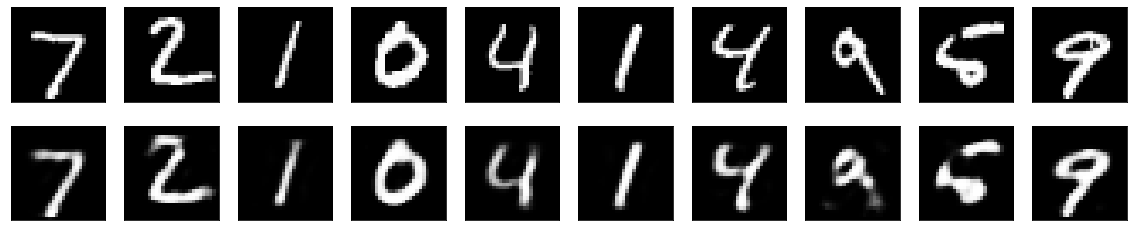

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

n = 10  # How many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

# Deep autoencoder 

In [ ]:
input_img = keras.Input(shape=(784,))
encoded = layers.Dense(128, activation='relu')(input_img)
encoded = layers.Dense(64, activation='relu')(encoded)
encoded = layers.Dense(32, activation='relu')(encoded)

decoded = layers.Dense(64, activation='relu')(encoded)
decoded = layers.Dense(128, activation='relu')(decoded)
decoded = layers.Dense(784, activation='sigmoid')(decoded)

In [ ]:
autoencoder = keras.Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

autoencoder.fit(x_train, x_train,
                epochs=100,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/100
235/235 [==============================] - 1s 4ms/step - loss: 0.3368 - val_loss: 0.1672
Epoch 2/100
235/235 [==============================] - 1s 4ms/step - loss: 0.1557 - val_loss: 0.1313
Epoch 3/100
235/235 [==============================] - 1s 4ms/step - loss: 0.1296 - val_loss: 0.1202
Epoch 4/100
235/235 [==============================] - 1s 4ms/step - loss: 0.1199 - val_loss: 0.1139
Epoch 5/100
235/235 [==============================] - 1s 3ms/step - loss: 0.1142 - val_loss: 0.1095
Epoch 6/100
235/235 [==============================] - 1s 4ms/step - loss: 0.1098 - val_loss: 0.1061
Epoch 7/100
235/235 [==============================] - 1s 4ms/step - loss: 0.1065 - val_loss: 0.1035
Epoch 8/100
235/235 [==============================] - 1s 4ms/step - loss: 0.1044 - val_loss: 0.1024
Epoch 9/100
235/235 [==============================] - 1s 4ms/step - loss: 0.1024 - val_loss: 0.0999
Epoch 10/100
235/235 [==============================] - 1s 4ms/step - loss: 0.1008 - val_lo

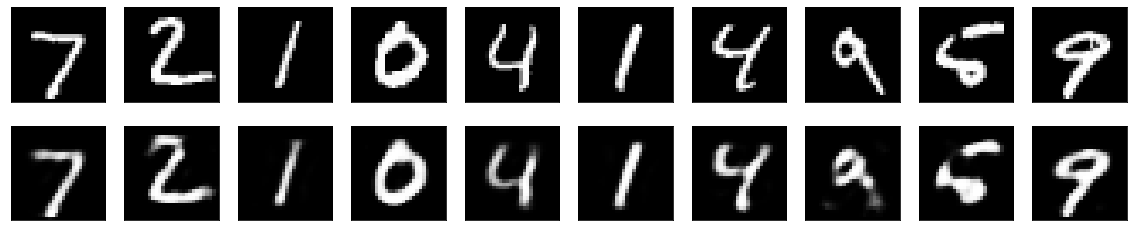

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

n = 10  # How many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

- Does it look better?
- Yes, after 100 epochs, it reaches a train and validation loss of ~0.08, a bit better than our previous models. Our reconstructed digits look a bit better too.

# Convolutional autoencoder
- The encoder will consist in a stack of Conv2D and MaxPooling2D layers (max pooling being used for spatial down-sampling), while the decoder will consist in a stack of Conv2D and UpSampling2D layers.

In [ ]:
import keras
from keras import layers

input_img = keras.Input(shape=(28, 28, 1))

x = layers.Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
encoded = layers.MaxPooling2D((2, 2), padding='same')(x)

# at this point the representation is (4, 4, 8) i.e. 128-dimensional

x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(16, (3, 3), activation='relu')(x)
x = layers.UpSampling2D((2, 2))(x)
decoded = layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = keras.Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [ ]:
encoded.shape, decoded.shape

(TensorShape([None, 4, 4, 8]), TensorShape([None, 28, 28, 1]))

- To train it, we will use the original MNIST digits with shape (samples, 28, 28, 1), and we will just normalize pixel values between 0 and 1.

In [ ]:
from keras.datasets import mnist
import numpy as np

(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))

In [ ]:
history = autoencoder.fit(x_train, x_train,
                        epochs=50,
                        batch_size=128,
                        shuffle=True,
                        validation_data=(x_test, x_test))

Epoch 1/50
469/469 [==============================] - 8s 5ms/step - loss: 0.3145 - val_loss: 0.1547
Epoch 2/50
469/469 [==============================] - 2s 5ms/step - loss: 0.1485 - val_loss: 0.1300
Epoch 3/50
469/469 [==============================] - 2s 5ms/step - loss: 0.1277 - val_loss: 0.1196
Epoch 4/50
469/469 [==============================] - 2s 5ms/step - loss: 0.1193 - val_loss: 0.1142
Epoch 5/50
469/469 [==============================] - 2s 5ms/step - loss: 0.1142 - val_loss: 0.1103
Epoch 6/50
469/469 [==============================] - 2s 5ms/step - loss: 0.1107 - val_loss: 0.1074
Epoch 7/50
469/469 [==============================] - 2s 5ms/step - loss: 0.1082 - val_loss: 0.1054
Epoch 8/50
469/469 [==============================] - 2s 5ms/step - loss: 0.1062 - val_loss: 0.1042
Epoch 9/50
469/469 [==============================] - 2s 5ms/step - loss: 0.1047 - val_loss: 0.1026
Epoch 10/50
469/469 [==============================] - 2s 5ms/step - loss: 0.1035 - val_loss: 0.1012

In [ ]:
history.history.keys()

dict_keys(['loss', 'val_loss'])

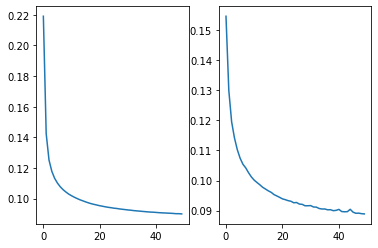

In [ ]:
plt.subplot(1,2,1)
plt.plot(history.history['loss'])
plt.subplot(1,2,2)
plt.plot(history.history['val_loss'])         

- The model converges to a loss of 0.09x, significantly better than our previous models (this is in large part due to the higher entropic capacity of the encoded representation, 128 dimensions vs. 32 previously)

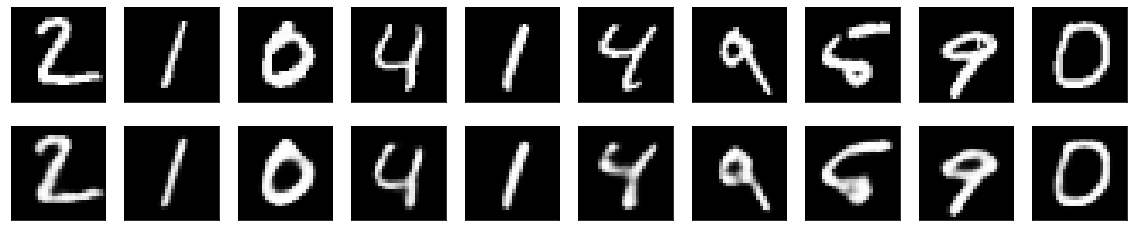

In [ ]:
decoded_imgs = autoencoder.predict(x_test)

n = 10
plt.figure(figsize=(20, 4))
for i in range(1, n + 1):
    # Display original
    ax = plt.subplot(2, n, i)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

- It should look better...

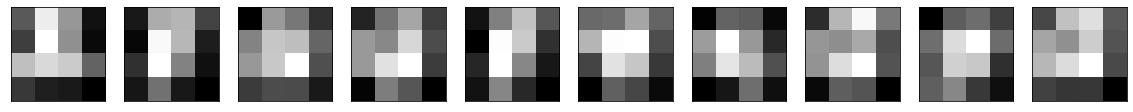

In [ ]:
encoder = keras.Model(input_img, encoded)
encoded_imgs = encoder.predict(x_test)

n = 10
plt.figure(figsize=(20, 8))
for i in range(1, n + 1):
    ax = plt.subplot(1, n, i)
    # plt.imshow(encoded_imgs[i].reshape((4, 4 * 8)).T)
    plt.imshow(encoded_imgs[i][:,:,0])
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

# Application to Image denoising
- It's simple: we will train the autoencoder to map noisy digits images to clean digits images.
- Here's how we will generate synthetic noisy digits: we just apply a gaussian noise matrix and clip the images between 0 and 1.

In [ ]:
from keras.datasets import mnist
import numpy as np

(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))

noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape) 
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape) 

x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

- Here's what the noisy digits look like:

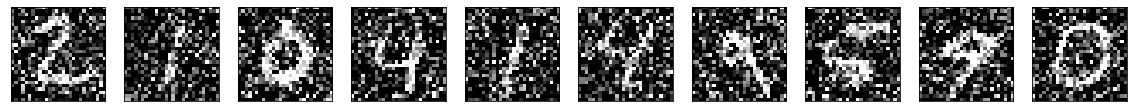

In [ ]:
n = 10
plt.figure(figsize=(20, 2))
for i in range(1, n + 1):
    ax = plt.subplot(1, n, i)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

- Compared to the previous convolutional autoencoder, in order to improve the quality of the reconstructed, we'll use a slightly different model with more filters per layer:

In [ ]:
input_img = keras.Input(shape=(28, 28, 1))

x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)
encoded = layers.MaxPooling2D((2, 2), padding='same')(x)

# At this point the representation is (7, 7, 32)

x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(encoded)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = layers.UpSampling2D((2, 2))(x)
decoded = layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = keras.Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [ ]:
autoencoder.fit(x_train_noisy, x_train,
                epochs=100,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test_noisy, x_test))

Epoch 1/100
469/469 [==============================] - 4s 7ms/step - loss: 0.2567 - val_loss: 0.1166
Epoch 2/100
469/469 [==============================] - 3s 6ms/step - loss: 0.1150 - val_loss: 0.1088
Epoch 3/100
469/469 [==============================] - 3s 6ms/step - loss: 0.1088 - val_loss: 0.1044
Epoch 4/100
469/469 [==============================] - 3s 6ms/step - loss: 0.1051 - val_loss: 0.1026
Epoch 5/100
469/469 [==============================] - 3s 6ms/step - loss: 0.1028 - val_loss: 0.1014
Epoch 6/100
469/469 [==============================] - 3s 6ms/step - loss: 0.1014 - val_loss: 0.0998
Epoch 7/100
469/469 [==============================] - 3s 6ms/step - loss: 0.1006 - val_loss: 0.0995
Epoch 8/100
469/469 [==============================] - 3s 6ms/step - loss: 0.0997 - val_loss: 0.0983
Epoch 9/100
469/469 [==============================] - 3s 6ms/step - loss: 0.0990 - val_loss: 0.0979
Epoch 10/100
469/469 [==============================] - 3s 6ms/step - loss: 0.0982 - val_lo

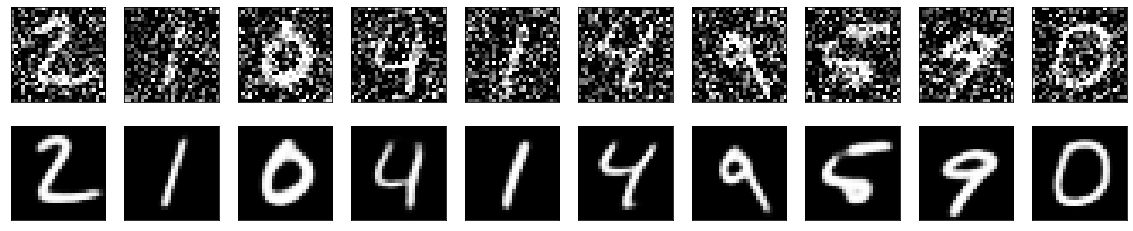

In [ ]:
decoded_imgs = autoencoder.predict(x_test)

n = 10
plt.figure(figsize=(20, 4))
for i in range(1, n + 1):
    # Display original
    ax = plt.subplot(2, n, i)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

- It seems to work pretty well. If you scale this process to a bigger convnet, you can start building document denoising or audio denoising models. Kaggle has an interesting dataset to get you started.

# Sequence-to-sequence autoencoder (seq2seq)
- If your inputs are sequences, rather than vectors or 2D images, then you may want to use as encoder and decoder a type of model that can capture temporal structure, such as a LSTM. 
- To build a LSTM-based autoencoder, first use a LSTM encoder to turn your input sequences into a single vector that contains information about the entire sequence, then repeat this vector n times (where n is the number of timesteps in the output sequence), and run a LSTM decoder to turn this constant sequence into the target sequence.
- see https://blog.keras.io/a-ten-minute-introduction-to-sequence-to-sequence-learning-in-keras.html
- will probably look like the following:

In [ ]:
timesteps = ...  # Length of your sequences
input_dim = ... 
latent_dim = ...

inputs = keras.Input(shape=(timesteps, input_dim))
encoded = layers.LSTM(latent_dim)(inputs)

decoded = layers.RepeatVector(timesteps)(encoded)
decoded = layers.LSTM(input_dim, return_sequences=True)(decoded)

sequence_autoencoder = keras.Model(inputs, decoded)
encoder = keras.Model(inputs, encoded)

# Variational autoencoder (VAE) - Generative model
- What is a variational autoencoder, you ask? It's a type of autoencoder with added constraints on the encoded representations being learned. 
- More precisely, it is an autoencoder that learns a latent variable model for its input data. So instead of letting your neural network learn an arbitrary function, you are learning the parameters of a probability distribution modeling your data. 
- If you sample points from this distribution, you can generate new input data samples: a VAE is a "generative model".

- how does it work?
  - First, an encoder network turns the input samples x into two parameters in a latent space, which we will note z_mean and z_log_sigma. 
  - Then, we randomly sample similar points z from the latent normal distribution that is assumed to generate the data, via z = z_mean + exp(z_log_sigma) * epsilon, where epsilon is a random normal tensor.
  - Finally, a decoder network maps these latent space points back to the original input data.